## 儲存格基本單位
ws["行列"]，例如：ws["A2"]

In [7]:
import openpyxl
import time
fn = "示範用excel.csv"
wb = openpyxl.Workbook()    # 建立空白的活頁簿
ws = wb.active              # 取得目前工作表
ws['A2'] = 'Apple'
ws['A3'] = 'Orange'
ws['B2'] = 200
ws['B3'] = 150
ws['B4'] = time.strftime("%Y/%m/%d")

# 取出數值
print("儲存格B2 = ", ws['B2'].value)    # B2 

# 取出該資料欄位的行、列、行列
print("儲存格B2 = ", ws['B2'].coordinate)    # B2
print("儲存格B2 = ", ws['B2'].row)    # B
print("儲存格B2 = ", ws['B2'].column)    # 2 
wb.save(fn)      # 將活頁簿儲存

儲存格B2 =  200
儲存格B2 =  B2
儲存格B2 =  2
儲存格B2 =  2


## 取得資料表的欄數、列數

In [9]:
import openpyxl
fn = "示範用excel.xlsx"
wb = openpyxl.load_workbook(fn)
ws = wb.active
print(f"工作表欄數 = {ws.max_column}")    
print(f"工作表列數 = {ws.max_row}")    


工作表欄數 = 2
工作表列數 = 4


## 取得rows跟columns

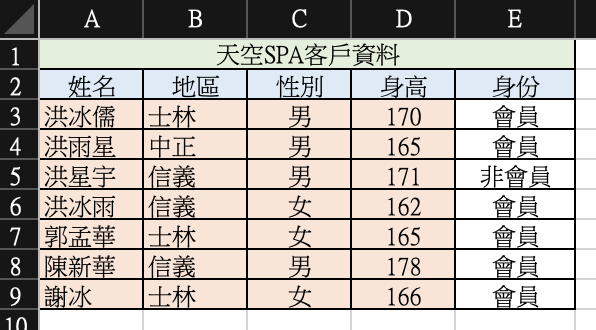

In [8]:
import openpyxl

fn = '天空SPA客戶資料.xlsx'
wb = openpyxl.load_workbook(fn)
ws = wb.active
print(f"工作表欄數 = {ws.max_column}")    
print(f"工作表列數 = {ws.max_row}") 

print(ws.rows)        # 獲得ws.rows資料類型
print(ws.columns)     # 獲得ws.columns資料類型



工作表欄數 = 5
工作表列數 = 9
<generator object Worksheet._cells_by_row at 0x1273b5000>
<generator object Worksheet._cells_by_col at 0x1273b5000>


In [12]:
# 取得A欄（姓名）
for cell in list(ws.columns)[0]:    # A欄
    print(cell.value)

天空SPA客戶資料
姓名
洪冰儒
洪雨星
洪星宇
洪冰雨
郭孟華
陳新華
謝冰


In [13]:
# 取得第二列
for cell in list(ws.rows)[2]:       # 索引是2
    print(cell.value, end=' ')  

洪冰儒 士林 男 170 會員 

In [16]:
# 逐條輸出
for row in ws.rows:
    for cell in row:
        print(cell.value, end=' ')
    print()
    
print("換個方向")

for col in ws.columns:
    for cell in col:
        print(cell.value, end=' ')
    print()

天空SPA客戶資料 None None None None 
姓名 地區 性別 身高 身份 
洪冰儒 士林 男 170 會員 
洪雨星 中正 男 165 會員 
洪星宇 信義 男 171 非會員 
洪冰雨 信義 女 162 會員 
郭孟華 士林 女 165 會員 
陳新華 信義 男 178 會員 
謝冰 士林 女 166 會員 
換個方向
天空SPA客戶資料 姓名 洪冰儒 洪雨星 洪星宇 洪冰雨 郭孟華 陳新華 謝冰 
None 地區 士林 中正 信義 信義 士林 信義 士林 
None 性別 男 男 男 女 女 男 女 
None 身高 170 165 171 162 165 178 166 
None 身份 會員 會員 非會員 會員 會員 會員 會員 


- min_row：可以回傳工作表有資料的最小列數。
- max_row：可以回傳工作表有資料的最大列數。
- min_column：可以回傳工作表有資料的最小欄數。
- max_column：可以回傳工作表有資料的最大欄數。

In [17]:
import openpyxl

fn = '天空SPA客戶資料.xlsx'
wb = openpyxl.load_workbook(fn)
ws = wb.active
print(f"工作表有資料最小列數 = {ws.min_row}")
print(f"工作表有資料最大列數 = {ws.max_row}")
print(f"工作表有資料最小欄數 = {ws.min_column}")
print(f"工作表有資料最大欄數 = {ws.max_column}")

工作表有資料最小列數 = 1
工作表有資料最大列數 = 9
工作表有資料最小欄數 = 1
工作表有資料最大欄數 = 5


iter_rows()/iter_cols() 

這個方法算產生的效果類似3-6節的 rows 屬性，不過可以使用此方法設定遍歷的區間。此函數會包含4個參數，語法如下：

`ws.iter_rows(min_row, max row, min_col, max_col)`
- min_row 和 max_row 可以設定逐列遍歷的列區間。
- min_col 和 max_col：可以設定逐行遍歷的欄區間。

In [19]:
import openpyxl

fn = '天空SPA客戶資料.xlsx'
wb = openpyxl.load_workbook(fn)
ws = wb.active
for row in ws.iter_rows(min_row=1,max_row=6,min_col=1,max_col=2):
    for cell in row:
        print(cell.value, end=' ')
    print()

天空SPA客戶資料 None 
姓名 地區 
洪冰儒 士林 
洪雨星 中正 
洪星宇 信義 
洪冰雨 信義 


In [20]:
import openpyxl

fn = '天空SPA客戶資料.xlsx'
wb = openpyxl.load_workbook(fn)
ws = wb.active
for col in ws.iter_cols(min_row=2,max_row=3,min_col=2,max_col=3):
    for cell in col:
        print(cell.value, end=' ')
    print()


地區 士林 
性別 男 


## 遍歷所有列（欄）資料

In [27]:
import openpyxl

fn = '天空SPA客戶資料.xlsx'
wb = openpyxl.load_workbook(fn)
ws = wb.active
for row in ws.iter_rows():
    # 每一行的資料，接著用for曲吧他讀出來
    # print(type(row)) # <class 'tuple'>
    print(row)
    for cell in row:
        print(cell.value)

print("-----------------------")

for col in ws.iter_cols():
    print(col)

(<Cell '工作表1'.A1>, <MergedCell '工作表1'.B1>, <MergedCell '工作表1'.C1>, <MergedCell '工作表1'.D1>, <MergedCell '工作表1'.E1>)
天空SPA客戶資料
None
None
None
None
(<Cell '工作表1'.A2>, <Cell '工作表1'.B2>, <Cell '工作表1'.C2>, <Cell '工作表1'.D2>, <Cell '工作表1'.E2>)
姓名
地區
性別
身高
身份
(<Cell '工作表1'.A3>, <Cell '工作表1'.B3>, <Cell '工作表1'.C3>, <Cell '工作表1'.D3>, <Cell '工作表1'.E3>)
洪冰儒
士林
男
170
會員
(<Cell '工作表1'.A4>, <Cell '工作表1'.B4>, <Cell '工作表1'.C4>, <Cell '工作表1'.D4>, <Cell '工作表1'.E4>)
洪雨星
中正
男
165
會員
(<Cell '工作表1'.A5>, <Cell '工作表1'.B5>, <Cell '工作表1'.C5>, <Cell '工作表1'.D5>, <Cell '工作表1'.E5>)
洪星宇
信義
男
171
非會員
(<Cell '工作表1'.A6>, <Cell '工作表1'.B6>, <Cell '工作表1'.C6>, <Cell '工作表1'.D6>, <Cell '工作表1'.E6>)
洪冰雨
信義
女
162
會員
(<Cell '工作表1'.A7>, <Cell '工作表1'.B7>, <Cell '工作表1'.C7>, <Cell '工作表1'.D7>, <Cell '工作表1'.E7>)
郭孟華
士林
女
165
會員
(<Cell '工作表1'.A8>, <Cell '工作表1'.B8>, <Cell '工作表1'.C8>, <Cell '工作表1'.D8>, <Cell '工作表1'.E8>)
陳新華
信義
男
178
會員
(<Cell '工作表1'.A9>, <Cell '工作表1'.B9>, <Cell '工作表1'.C9>, <Cell '工作表1'.D9>, <Cell '工作表1'.E9>)
謝冰
士林
女
166
會員


In [31]:
import openpyxl

fn = '天空SPA客戶資料.xlsx'
wb = openpyxl.load_workbook(fn)
ws = wb.active
for row in ws.iter_rows(values_only=True):
    print(row)
   

('天空SPA客戶資料', None, None, None, None)
('姓名', '地區', '性別', '身高', '身份')
('洪冰儒', '士林', '男', 170, '會員')
('洪雨星', '中正', '男', 165, '會員')
('洪星宇', '信義', '男', 171, '非會員')
('洪冰雨', '信義', '女', 162, '會員')
('郭孟華', '士林', '女', 165, '會員')
('陳新華', '信義', '男', 178, '會員')
('謝冰', '士林', '女', 166, '會員')


## 使用切片讀資料(推薦)

首先，你要先獲得資料表的左上角跟右下角座標

In [44]:
import openpyxl

fn = '天空SPA客戶資料.xlsx'
wb = openpyxl.load_workbook(fn)
ws = wb.active
print(ws.dimensions)

A1:E9


In [42]:
import openpyxl

fn = '天空SPA客戶資料.xlsx'
wb = openpyxl.load_workbook(fn)
ws = wb.active
for row in ws.iter_rows():
    for cell in row:
        print(f"{cell.coordinate}", end=" ")
    print()
    

for row in ws['A1':'E9']:
    for cell in row:
        print(cell.value, end=' ')
    print()


A1 B1 C1 D1 E1 
A2 B2 C2 D2 E2 
A3 B3 C3 D3 E3 
A4 B4 C4 D4 E4 
A5 B5 C5 D5 E5 
A6 B6 C6 D6 E6 
A7 B7 C7 D7 E7 
A8 B8 C8 D8 E8 
A9 B9 C9 D9 E9 
天空SPA客戶資料 None None None None 
姓名 地區 性別 身高 身份 
洪冰儒 士林 男 170 會員 
洪雨星 中正 男 165 會員 
洪星宇 信義 男 171 非會員 
洪冰雨 信義 女 162 會員 
郭孟華 士林 女 165 會員 
陳新華 信義 男 178 會員 
謝冰 士林 女 166 會員 


也可以使用下列协片方式取得特定欄或列的儲存格區間的資料。
```
ws['B:D'] ＃取得B至D欄間的儲存格資料
ws[3:6] #取得第3至6列間的儲存格資料
```




In [43]:
import openpyxl

fn = '天空SPA客戶資料.xlsx'
wb = openpyxl.load_workbook(fn)
ws = wb.active
data_range = ws['B':'D']
for cols in data_range:
    for cell in cols:
        print(cell.value, end=' ')
    print()

None 地區 士林 中正 信義 信義 士林 信義 士林 
None 性別 男 男 男 女 女 男 女 
None 身高 170 165 171 162 165 178 166 


## 串列寫進資料

In [46]:
import openpyxl

wb = openpyxl.Workbook()        # 建立空白的活頁簿
ws = wb.active                  # 獲得目前工作表
row1 = ['數學','物理','化學']   # 定義串列資料
ws.append(row1)                 # 寫入串列
row2 = [98, 82, 89]             # 定義串列資料
ws.append(row2)                 # 寫入串列

# 輸出資料
for row in ws.iter_rows():
    for cell in row:
        print(f"{cell.value}", end=" ")
    print()
# wb.save('out3_27.xlsx')         # 將活頁簿儲存

數學 物理 化學 
98 82 89 


In [47]:
import openpyxl

wb = openpyxl.Workbook()    # 建立空白的活頁簿
ws = wb.active              # 獲得目前工作表
ws['A1'] = '明志科技大學'
rows = [                    # 定義串列資料
    ['數學', '物理', '化學'],
    [98, 82, 89],
    [79, 88, 90],
    [80, 78, 91]]                   
for row in rows:
    ws.append(row)          # 寫入串列

# 輸出資料
for row in ws.iter_rows():
    for cell in row:
        print(f"{cell.value}", end=" ")
    print()

# wb.save('out3_28.xlsx')     # 將活頁簿儲存

明志科技大學 None None 
數學 物理 化學 
98 82 89 
79 88 90 
80 78 91 


## 欄數與欄位名稱轉換

在 Excel中欄名稱是A、B、•Z、AA、AB、AC、⋯等，例如：1代表A、2代表B、26代表Z、27代表AA、28代表AB

如果工作表的欄位數很多時，很明顯我們無法很清楚了解到底索引是多少，例如：BC是多少？

```
get_column_letter（數值） ＃將數值轉成字母
column_index_from_string(字母) #將字母轉成數值
```

In [48]:
import openpyxl
from openpyxl.utils import get_column_letter, column_index_from_string

wb = openpyxl.Workbook()
ws = wb.active
print("欄數= ",get_column_letter(ws.max_column))
print("3   = ",get_column_letter(3))
print("27  = ",get_column_letter(27))
print("100 = ",get_column_letter(100))
print("800 = ",get_column_letter(800))

print("A   = ", column_index_from_string('A'))
print("E   = ", column_index_from_string('E'))
print("AA  = ", column_index_from_string('AA'))
print("AZ  = ", column_index_from_string('AZ'))
print("AAA = ", column_index_from_string('AAA'))

欄數=  A
3   =  C
27  =  AA
100 =  CV
800 =  ADT
A   =  1
E   =  5
AA  =  27
AZ  =  52
AAA =  703
